In [228]:
# Bridging the Digital Divide: A 2023 Analysis of AI readiness in ASEAN compared to Global Leaders.

## PART 1 : Load Datasets

## PART 2 : Clean Each Dataset

## PART 3 : Merge Datasets

## PART 4 : Analysis and Visualizations

In [152]:
# PART 1 : Load Datasets ============================================

In [153]:
import pandas as pd 

df_internet = pd.read_csv("Enhanced_global_internet_adoption_monthly_2015_2025.csv")
df_ai = pd.read_csv("AI_preparedness_index.csv")
df_cyber = pd.read_csv("Cyber_security_index.csv")
df_sdg = pd.read_csv("Sustainable_development_report_2023.csv")
df_region = pd.read_csv("country_region_mapping.csv")

In [154]:
# PART 2 : Clean Each Dataset =====================================

In [155]:
## PART 2.1 : Enhanced_global_internet_adoption_monthly_2015_2025.csv

In [156]:
# Check rows x columns
print("Shape:", df_internet.shape)

# Show column names
print("\nColumns:\n", df_internet.columns.tolist())

# Show data types 
print("\nInfo:\n", df_internet.info())

#Show head
print(df_internet.head())

Shape: (6350, 28)

Columns:
 ['Country', 'Date', 'Population', 'Internet_Penetration (%)', 'Broadband_Speed (Mbps)', 'Mobile_Broadband_Speed (Mbps)', 'GDP_Per_Capita (USD)', 'Education_Attainment_Index (%)', 'Mobile_Data_Usage (GB per User)', 'Digital_Investment (M USD)', 'Digital_Literacy_Score (%)', 'Sentiment_Score (Social Media)', '5G_Rollout_Status', 'Urban_Population_Split (%)', 'Rural_Population_Split (%)', 'Latitude', 'Longitude', 'Internet_Access_Cost (USD per Mbps)', 'Device_Penetration (%)', 'Cybersecurity_Incidents (Count)', 'E_Commerce_Penetration (%)', 'Government_Digital_Policy_Index (%)', 'Network_Latency (ms)', 'Cloud_Service_Adoption (%)', 'IoT_Device_Density (per 1000 people)', 'AI_Adoption_Index (%)', 'Data_Privacy_Regulation_Strength (%)', 'Energy_Consumption_for_Connectivity (kWh)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  

In [157]:
# Check missing values in each column
print(df_internet.isnull().sum().sort_values(ascending = False))

5G_Rollout_Status                            3072
Country                                         0
Population                                      0
Date                                            0
Broadband_Speed (Mbps)                          0
Mobile_Broadband_Speed (Mbps)                   0
GDP_Per_Capita (USD)                            0
Education_Attainment_Index (%)                  0
Mobile_Data_Usage (GB per User)                 0
Digital_Investment (M USD)                      0
Digital_Literacy_Score (%)                      0
Internet_Penetration (%)                        0
Sentiment_Score (Social Media)                  0
Urban_Population_Split (%)                      0
Rural_Population_Split (%)                      0
Latitude                                        0
Longitude                                       0
Internet_Access_Cost (USD per Mbps)             0
Device_Penetration (%)                          0
Cybersecurity_Incidents (Count)                 0


In [158]:
# Check duplicate rows
print("Duplicate rows:", df_internet.duplicated().sum())

Duplicate rows: 0


In [159]:
# Filter columns
columns_filtered = [
    "Country", "Date", "Internet_Penetration (%)", "Broadband_Speed (Mbps)", "Mobile_Broadband_Speed (Mbps)",
    "GDP_Per_Capita (USD)", "Education_Attainment_Index (%)", "Digital_Investment (M USD)",
    "Digital_Literacy_Score (%)", "5G_Rollout_Status", "Internet_Access_Cost (USD per Mbps)",
    "Device_Penetration (%)", "AI_Adoption_Index (%)", "Cloud_Service_Adoption (%)",
    "IoT_Device_Density (per 1000 people)", "E_Commerce_Penetration (%)",
    "Government_Digital_Policy_Index (%)", "Data_Privacy_Regulation_Strength (%)"
]

filtered_df_internet = df_internet[columns_filtered]

print(filtered_df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               6350 non-null   object 
 1   Date                                  6350 non-null   object 
 2   Internet_Penetration (%)              6350 non-null   float64
 3   Broadband_Speed (Mbps)                6350 non-null   float64
 4   Mobile_Broadband_Speed (Mbps)         6350 non-null   float64
 5   GDP_Per_Capita (USD)                  6350 non-null   float64
 6   Education_Attainment_Index (%)        6350 non-null   float64
 7   Digital_Investment (M USD)            6350 non-null   float64
 8   Digital_Literacy_Score (%)            6350 non-null   float64
 9   5G_Rollout_Status                     3278 non-null   object 
 10  Internet_Access_Cost (USD per Mbps)   6350 non-null   float64
 11  Device_Penetratio

In [160]:
# Convert to Categorical columns
filtered_df_internet.loc[:, "5G_Rollout_Status"] = df_internet["5G_Rollout_Status"].astype("category")

In [229]:
# Make a copy 
filtered_df_internet = filtered_df_internet.copy()

# Convert 'Date' column to datetime
filtered_df_internet["Date"] = pd.to_datetime(filtered_df_internet["Date"], errors='coerce')

# Round all to 2 decimal places
filtered_df_internet = filtered_df_internet.round(2)

# Review Dataset
print(filtered_df_internet.head(2))

   Country       Date  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Algeria 2015-01-01                     37.44                   46.84   
1  Algeria 2015-02-01                     37.48                   47.23   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                           8.53               5327.30   
1                           8.69               5331.73   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           45.49                      164.13   
1                           45.56                      165.39   

   Digital_Literacy_Score (%) 5G_Rollout_Status  \
0                       46.46               NaN   
1                       46.45               NaN   

   Internet_Access_Cost (USD per Mbps)  Device_Penetration (%)  \
0                                 2.90                   68.10   
1                                 2.89                   68.12   

   AI_Adoption_Index (%)  Cloud_Service_Adoption (

In [162]:
filtered_df_internet.to_csv("filtered_df_internet.csv", index=False)

In [163]:
selected_countries = [
    # Global leaders for each region
    "United States", "Canada", "United Kingdom", "Germany", "France",
    "China", "Japan", "South Korea", "India", "Bangladesh",
    "United Arab Emirates", "Qatar", "Saudi Arabia",
    "South Africa", "Nigeria", "Kenya",
    "Australia", "New Zealand",
    "Brazil", "Chile", "Mexico",

    # ASEAN countries
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar",
    "Philippines", "Singapore", "Thailand", "Vietnam"
]

cleaned_df_internet = filtered_df_internet[filtered_df_internet["Country"].isin(selected_countries)].reset_index(drop=True)

# Save cleaned data
cleaned_df_internet.to_csv("Cleaned_df_internet.csv", index=False)

# Preview
print(cleaned_df_internet.head(3))
print("Countries included:", cleaned_df_internet["Country"].unique())
print("Shape:", cleaned_df_internet.shape)

     Country       Date  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Australia 2015-01-01                     64.44                  122.41   
1  Australia 2015-02-01                     64.70                  122.21   
2  Australia 2015-03-01                     64.60                  122.53   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                          92.18              32174.00   
1                          92.41              32187.72   
2                          92.60              32193.43   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           90.49                      580.73   
1                           90.49                      581.25   
2                           90.55                      582.11   

   Digital_Literacy_Score (%) 5G_Rollout_Status  \
0                       79.56               NaN   
1                       79.56               NaN   
2                       79.63               

In [164]:
# Ensure Date column is in datetime format
cleaned_df_internet["Date"] = pd.to_datetime(cleaned_df_internet["Date"], errors='coerce')

# Filter rows where the year is 2023
df_internet_2023 = cleaned_df_internet[cleaned_df_internet["Date"].dt.year == 2023]

# Group by Country and calculate the mean for all numeric columns
df_internet_2023_mean = df_internet_2023.groupby("Country").mean(numeric_only=True).reset_index()

# Round to 2 decimal place 
df_internet_2023_mean = df_internet_2023_mean.round(2)

# Display result
print(df_internet_2023_mean.head())

     Country  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Australia                     83.14                  139.20   
1     Brazil                     66.06                   27.58   
2     Canada                     83.17                  126.01   
3      Chile                     66.03                   41.74   
4      China                     66.09                   32.59   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                         104.93              33020.40   
1                          51.11              19470.79   
2                          48.04              59891.41   
3                          47.30               6963.51   
4                          38.80               8548.75   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           94.70                      665.17   
1                           36.47                      526.12   
2                           81.53                     1346.

In [165]:
# Save to CSV
df_internet_2023_mean.to_csv("Cleaned_Internet_Data_2023.csv", index=False)

In [166]:
## PART 2.2 : Ecountry_region_mapping.csv

In [167]:
# Check rows x columns
print("Shape:", df_region.shape)

# Show column names
print("\nColumns:\n", df_region.columns.tolist())

# Show data types 
print("\nInfo:\n", df_region.info())

#Show head
print(df_region.head(2))

Shape: (50, 2)

Columns:
 ['Country', 'Region']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  50 non-null     object
 1   Region   50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes

Info:
 None
     Country         Region
0    Algeria         Africa
1  Argentina  South America


In [168]:
# Check for missing values
print("\nMissing values:")
print(df_region.isnull().sum())


Missing values:
Country    0
Region     0
dtype: int64


In [169]:
# Save the dataset as df_region_2023
df_region_2023 = df_region.copy()

# Save to CSV
df_region_2023.to_csv("Cleaned_Region_2023.csv", index=False)

In [170]:
## PART 2.3 : AI_preparedness_index.csv

In [171]:
# Check rows x columns
print("Shape:", df_ai.shape)

# Show column names
print("\nColumns:\n", df_ai.columns.tolist())

# Show data types 
print("\nInfo:\n", df_ai.info())

#Show head
print(df_ai.head(2))

Shape: (174, 12)

Columns:
 ['ISO', 'Country', 'AI preparedness Index', 'GDP per capita (current US$)', 'GDP per capita growth (annual %)', 'Real GDP growth (Annual change in %)', 'Innovation and Economic Integration', 'Digitial Infrastructure', 'Individuals using the Internet (% of population)', 'Secure Internet servers (per 1 million people)', 'Regulation and Ethics', 'Human Capital and Labor Market Policies']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ISO                                               174 non-null    object 
 1   Country                                           174 non-null    object 
 2   AI preparedness Index                             165 non-null    float64
 3   GDP per capita (current US$)                      168 non-null    float64
 4   

In [172]:
# Filter  columns
columns_filtered_ai = [
    "Country",
    "AI preparedness Index",
    "Innovation and Economic Integration",
    "Digitial Infrastructure",
    "Individuals using the Internet (% of population)",
    "Secure Internet servers (per 1 million people)",
    "Regulation and Ethics",
    "Human Capital and Labor Market Policies"
]

df_ai_filtered = df_ai[columns_filtered_ai].copy()

# Preview
print(df_ai_filtered.head())

     Country  AI preparedness Index  Innovation and Economic Integration  \
0  Australia                   0.73                                 0.16   
1    Austria                   0.72                                 0.17   
2    Belgium                   0.67                                 0.17   
3     Canada                   0.71                                 0.16   
4    Croatia                   0.58                                 0.14   

   Digitial Infrastructure  Individuals using the Internet (% of population)  \
0                     0.18                                              97.1   
1                     0.19                                              95.3   
2                     0.17                                              94.6   
3                     0.17                                              94.0   
4                     0.17                                              83.2   

   Secure Internet servers (per 1 million people)  Regulation 

In [173]:
# Country list 
selected_countries = [
    # Global leaders for each region
    "United States", "Canada", "United Kingdom", "Germany", "France",
    "China", "Japan", "South Korea", "India", "Bangladesh",
    "United Arab Emirates", "Qatar", "Saudi Arabia",
    "South Africa", "Nigeria", "Kenya",
    "Australia", "New Zealand",
    "Brazil", "Chile", "Mexico",

    # ASEAN countries
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar",
    "Philippines", "Singapore", "Thailand", "Vietnam"
]

cleaned_df_ai_filtered = df_ai_filtered[df_ai_filtered["Country"].isin(selected_countries)].reset_index(drop=True)

# Save cleaned data
cleaned_df_ai_filtered.to_csv("Cleaned_df_ai.csv", index=False)

# Preview
print(cleaned_df_ai_filtered.head(2))
print("Countries included:", cleaned_df_ai_filtered["Country"].unique())
print("Shape:", cleaned_df_ai_filtered.shape)

     Country  AI preparedness Index  Innovation and Economic Integration  \
0  Australia                   0.73                                 0.16   
1     Canada                   0.71                                 0.16   

   Digitial Infrastructure  Individuals using the Internet (% of population)  \
0                     0.18                                              97.1   
1                     0.17                                              94.0   

   Secure Internet servers (per 1 million people)  Regulation and Ethics  \
0                                         47568.0                   0.21   
1                                         42550.0                   0.21   

   Human Capital and Labor Market Policies  
0                                     0.17  
1                                     0.17  
Countries included: ['Australia' 'Canada' 'France' 'Germany' 'Japan' 'New Zealand' 'Singapore'
 'United Kingdom' 'United States' 'Brazil' 'Chile' 'China' 'India'
 'In

In [174]:
# Check missing values
missing_values = cleaned_df_ai_filtered.isnull().sum()

# Display non-zero missing value columns only
missing_values = missing_values[missing_values > 0]

print("Missing values in filtered AI dataset:")
print(missing_values)

Missing values in filtered AI dataset:
Individuals using the Internet (% of population)    1
dtype: int64


In [175]:
# Fill missing value with column mean
col = "Individuals using the Internet (% of population)"
mean_value = round(cleaned_df_ai_filtered[col].mean(), 2)
cleaned_df_ai_filtered[col] = cleaned_df_ai_filtered[col].fillna(mean_value)

# Confirm no missing values
print(cleaned_df_ai_filtered.isnull().sum())

Country                                             0
AI preparedness Index                               0
Innovation and Economic Integration                 0
Digitial Infrastructure                             0
Individuals using the Internet (% of population)    0
Secure Internet servers (per 1 million people)      0
Regulation and Ethics                               0
Human Capital and Labor Market Policies             0
dtype: int64


In [176]:
cleaned_df_ai_filtered.to_csv("cleaned_df_ai_2023.csv", index=False)

In [177]:
## PART 2.4 : Cyber_security_index.csv

In [178]:
# Check rows x columns
print("Shape:", df_cyber.shape)

# Show column names
print("\nColumns:\n", df_cyber.columns.tolist())

# Show data types 
print("\nInfo:\n", df_cyber.info())

#Show head
print(df_cyber.head(2))

Shape: (192, 6)

Columns:
 ['Country', 'Region', 'CEI', 'GCI', 'NCSI', 'DDL']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  192 non-null    object 
 1   Region   192 non-null    object 
 2   CEI      108 non-null    float64
 3   GCI      190 non-null    float64
 4   NCSI     167 non-null    float64
 5   DDL      152 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.1+ KB

Info:
 None
       Country        Region    CEI    GCI   NCSI    DDL
0  Afghanistan  Asia-Pasific  1.000   5.20  11.69  19.50
1      Albania        Europe  0.566  64.32  62.34  48.74


In [179]:
# Filter  columns
df_cyber_filtered = df_cyber[["Country", "NCSI", "DDL"]]

# Preview
print(df_cyber_filtered.head())

       Country   NCSI    DDL
0  Afghanistan  11.69  19.50
1      Albania  62.34  48.74
2      Algeria  33.77  42.81
3      Andorra    NaN    NaN
4       Angola   9.09  22.69


In [180]:
# Country list 
selected_countries = [
    # Global leaders for each region
    "United States", "Canada", "United Kingdom", "Germany", "France",
    "China", "Japan", "South Korea", "India", "Bangladesh",
    "United Arab Emirates", "Qatar", "Saudi Arabia",
    "South Africa", "Nigeria", "Kenya",
    "Australia", "New Zealand",
    "Brazil", "Chile", "Mexico",

    # ASEAN countries
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar",
    "Philippines", "Singapore", "Thailand", "Vietnam"
]

cleaned_df_cyber_filtered = df_cyber_filtered[df_cyber_filtered["Country"].isin(selected_countries)].reset_index(drop=True)

# Save cleaned data
cleaned_df_cyber_filtered.to_csv("Cleaned_df_cyber.csv", index=False)

# Preview
print(cleaned_df_cyber_filtered.head(2))
print("Countries included:", cleaned_df_cyber_filtered["Country"].unique())
print("Shape:", cleaned_df_cyber_filtered.shape)

      Country   NCSI    DDL
0   Australia  66.23  77.61
1  Bangladesh  67.53  33.11
Countries included: ['Australia' 'Bangladesh' 'Brazil' 'Cambodia' 'Canada' 'Chile' 'China'
 'France' 'Germany' 'India' 'Indonesia' 'Japan' 'Kenya' 'Malaysia'
 'Mexico' 'Myanmar' 'New Zealand' 'Nigeria' 'Philippines' 'Qatar'
 'Saudi Arabia' 'Singapore' 'South Africa' 'South Korea' 'Thailand'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Vietnam']
Shape: (29, 3)


In [181]:
# Check missing values
missing_values = cleaned_df_cyber_filtered.isnull().sum()

# Display non-zero missing value columns only
missing_values = missing_values[missing_values > 0]

print("Missing values in Cyber Security dataset:")
print(missing_values)

Missing values in Cyber Security dataset:
Series([], dtype: int64)


In [182]:
cleaned_df_cyber_filtered.to_csv("cleaned_df_cyber_2023.csv", index=False)

In [183]:
## PART 2.5 : Sustainable_development_report_2023.csv

In [184]:
# Check rows x columns
print("Shape:", df_sdg.shape)

# Show column names
print("\nColumns:\n", df_sdg.columns.tolist())

# Show data types 
print("\nInfo:\n", df_sdg.info())

# show head
print(df_sdg.head(2))

Shape: (166, 21)

Columns:
 ['country_code', 'country', 'region', 'overall_score', 'goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score', 'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   166 non-null    object 
 1   country        166 non-null    object 
 2   region         166 non-null    object 
 3   overall_score  166 non-null    float64
 4   goal_1_score   151 non-null    float64
 5   goal_2_score   166 non-null    float64
 6   goal_3_score   166 non-null    float64
 7   goal_4_score   166 non-null    float64
 8   goal_5_score   166 non-null    float64
 9   goal_6_score   166 non-null    float64
 10 

In [185]:
# Filter  columns
df_sdg_filtered = df_sdg[["country", "overall_score", "goal_4_score", 
                          "goal_8_score", "goal_9_score", "goal_16_score"]
]

# Show head
print(df_sdg_filtered.head())

   country  overall_score  goal_4_score  goal_8_score  goal_9_score  \
0  Finland      86.760595     97.169333     86.789000     95.995714   
1   Sweden      85.981397     99.761667     84.966429     97.586286   
2  Denmark      85.683637     99.339667     87.562429     96.984857   
3  Germany      83.358447     97.162667     86.967286     95.788429   
4  Austria      82.280189     97.914333     83.274143     96.982143   

   goal_16_score  
0      92.521091  
1      88.508455  
2      93.844909  
3      89.457545  
4      87.911455  


In [186]:
# Round all columns except the first (e.g., assume it's 'Country')
df_sdg_filtered = df_sdg.copy()
df_sdg_filtered[df_sdg_filtered.columns[1:]] = df_sdg_filtered[df_sdg_filtered.columns[1:]].round(2)

# Show head
print(df_sdg_filtered.head())

  country_code  country region  overall_score  goal_1_score  goal_2_score  \
0          FIN  Finland   OECD          86.76         99.58         60.89   
1          SWE   Sweden   OECD          85.98         98.89         63.07   
2          DNK  Denmark   OECD          85.68         99.22         71.03   
3          DEU  Germany   OECD          83.36         99.51         72.37   
4          AUT  Austria   OECD          82.28         99.45         73.07   

   goal_3_score  goal_4_score  goal_5_score  goal_6_score  ...  goal_8_score  \
0         95.39         97.17         92.11         94.33  ...         86.79   
1         96.90         99.76         91.44         95.06  ...         84.97   
2         95.40         99.34         87.00         90.73  ...         87.56   
3         93.04         97.16         81.92         88.44  ...         86.97   
4         92.47         97.91         84.58         92.16  ...         83.27   

   goal_9_score  goal_10_score  goal_11_score  goal_12_s

In [187]:
# Select Countries
selected_countries = [
    # Global leaders for each region
    "United States", "Canada", "United Kingdom", "Germany", "France",
    "China", "Japan", "South Korea", "India", "Bangladesh",
    "United Arab Emirates", "Qatar", "Saudi Arabia",
    "South Africa", "Nigeria", "Kenya",
    "Australia", "New Zealand",
    "Brazil", "Chile", "Mexico",

    # ASEAN countries
    "Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar",
    "Philippines", "Singapore", "Thailand", "Vietnam"
]

cleaned_df_sdg_filtered = df_sdg_filtered[df_sdg_filtered["country"].isin(selected_countries)].reset_index(drop=True)

# Save cleaned data
cleaned_df_sdg_filtered.to_csv("Cleaned_df_sdg.csv", index=False)

# Show head
print(cleaned_df_sdg_filtered.head(2))
print("Countries included:", cleaned_df_sdg_filtered["country"].unique())
print("Shape:", cleaned_df_sdg_filtered.shape)

  country_code  country region  overall_score  goal_1_score  goal_2_score  \
0          DEU  Germany   OECD          83.36         99.51         72.37   
1          FRA   France   OECD          82.05         99.73         72.39   

   goal_3_score  goal_4_score  goal_5_score  goal_6_score  ...  goal_8_score  \
0         93.04         97.16         81.92         88.44  ...         86.97   
1         93.22         99.63         87.82         89.27  ...         85.31   

   goal_9_score  goal_10_score  goal_11_score  goal_12_score  goal_13_score  \
0         95.79          88.15          90.10          55.41          64.00   
1         92.78          87.47          90.53          60.52          73.83   

   goal_14_score  goal_15_score  goal_16_score  goal_17_score  
0          74.00          79.23          89.46          84.39  
1          65.68          68.82          76.09          73.11  

[2 rows x 21 columns]
Countries included: ['Germany' 'France' 'United Kingdom' 'Japan' 'Canada' 

In [188]:
# Select columns
selected_columns = ['country', 'overall_score', 'goal_4_score', 'goal_8_score', 'goal_9_score', 'goal_16_score']
df_sdg_filtered = df_sdg[selected_columns].copy()

# Round numeric columns
df_sdg_filtered[df_sdg_filtered.columns[1:]] = df_sdg_filtered[df_sdg_filtered.columns[1:]].round(2)

# Show head
print(df_sdg_filtered.head())

   country  overall_score  goal_4_score  goal_8_score  goal_9_score  \
0  Finland          86.76         97.17         86.79         96.00   
1   Sweden          85.98         99.76         84.97         97.59   
2  Denmark          85.68         99.34         87.56         96.98   
3  Germany          83.36         97.16         86.97         95.79   
4  Austria          82.28         97.91         83.27         96.98   

   goal_16_score  
0          92.52  
1          88.51  
2          93.84  
3          89.46  
4          87.91  


In [189]:
# Check missing values
missing_values = cleaned_df_sdg_filtered.isnull().sum()

# Display non-zero missing value columns only
missing_values = missing_values[missing_values > 0]

# Show missing values
print("Missing values in Sustainable development dataset:")
print(missing_values)

Missing values in Sustainable development dataset:
goal_1_score     4
goal_10_score    4
dtype: int64


In [190]:
# Rename 'country' to 'Country'
cleaned_df_sdg_filtered.rename(columns={"country": "Country"}, inplace=True)

# Confirm rename
print("\nColumns after renaming:")
print(cleaned_df_sdg_filtered.columns)


Columns after renaming:
Index(['country_code', 'Country', 'region', 'overall_score', 'goal_1_score',
       'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
       'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score',
       'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score',
       'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score'],
      dtype='object')


In [191]:
cleaned_df_sdg_filtered.to_csv("cleaned_df_sdg_2023.csv", index=False)

In [192]:
# PART 3 : Merge Dataset ============================================

In [193]:
## PART 3.1 : df_internet_2023_mean and  df_region_2023

In [194]:
# Merge Internet mean data with Region data on "Country"
df_merged_1 = pd.merge(df_internet_2023_mean, df_region_2023, on="Country", how="left")

# Round all numeric columns to 2 decimal places
df_merged_1 = df_merged_1.round(2)

# Save the merged dataset
df_merged_1.to_csv("merged_internet_region.csv", index=False)

# Preview
print("Step 1 complete: df_merged_1")
print(df_merged_1.head(2))

Step 1 complete: df_merged_1
     Country  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Australia                     83.14                  139.20   
1     Brazil                     66.06                   27.58   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                         104.93              33020.40   
1                          51.11              19470.79   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           94.70                      665.17   
1                           36.47                      526.12   

   Digital_Literacy_Score (%)  Internet_Access_Cost (USD per Mbps)  \
0                       82.10                                 0.83   
1                       50.13                                 5.58   

   Device_Penetration (%)  AI_Adoption_Index (%)  Cloud_Service_Adoption (%)  \
0                   95.27                  59.09                       61.49   
1                   56.24     

In [195]:
## PART 3.2 : df_merged_1 and cleaned_df_ai_filtered

In [196]:
# Merge df_merged_1 with AI Preparedness data on "Country"
df_merged_2 = pd.merge(df_merged_1, cleaned_df_ai_filtered, on="Country", how="left")

# Round all numeric columns to 2 decimal places
df_merged_2 = df_merged_2.round(2)

# Save the merged dataset
df_merged_2.to_csv("merged_step2_internet_region_ai.csv", index=False)

# Preview
print("Step 2 complete: df_merged_2")
print(df_merged_2.head(2))

Step 2 complete: df_merged_2
     Country  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Australia                     83.14                  139.20   
1     Brazil                     66.06                   27.58   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                         104.93              33020.40   
1                          51.11              19470.79   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           94.70                      665.17   
1                           36.47                      526.12   

   Digital_Literacy_Score (%)  Internet_Access_Cost (USD per Mbps)  \
0                       82.10                                 0.83   
1                       50.13                                 5.58   

   Device_Penetration (%)  ...  Government_Digital_Policy_Index (%)  \
0                   95.27  ...                                88.56   
1                   56.24  ...                  

In [197]:
## PART 3.3 : df_merged_2 and cleaned_df_cyber_filtered

In [198]:
# Merge df_merged_2 with Cybersecurity data on "Country"
df_merged_3 = pd.merge(df_merged_2, cleaned_df_cyber_filtered, on="Country", how="left")

# Round all numeric columns to 2 decimal places
df_merged_3 = df_merged_3.round(2)

# Save the merged dataset
df_merged_3.to_csv("merged_step3_internet_region_ai_cyber.csv", index=False)

# Preview
print("Step 3 complete: df_merged_3")
print(df_merged_3.head(2))

Step 3 complete: df_merged_3
     Country  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Australia                     83.14                  139.20   
1     Brazil                     66.06                   27.58   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                         104.93              33020.40   
1                          51.11              19470.79   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           94.70                      665.17   
1                           36.47                      526.12   

   Digital_Literacy_Score (%)  Internet_Access_Cost (USD per Mbps)  \
0                       82.10                                 0.83   
1                       50.13                                 5.58   

   Device_Penetration (%)  ...         Region  AI preparedness Index  \
0                   95.27  ...        Oceania                   0.73   
1                   56.24  ...  South America 

In [199]:
# Merge df_merged_3 with SDG data on "Country"
df_final = pd.merge(df_merged_3, cleaned_df_sdg_filtered, on="Country", how="left")

# Round all numeric columns to 2 decimal places
df_final = df_final.round(2)

# Save the final merged dataset
df_final.to_csv("final_merged_asean_dataset.csv", index=False)

# Preview
print("Final merge complete: df_final")
print(df_final.head(2))
print("Shape:", df_final.shape)

Final merge complete: df_final
     Country  Internet_Penetration (%)  Broadband_Speed (Mbps)  \
0  Australia                     83.14                  139.20   
1     Brazil                     66.06                   27.58   

   Mobile_Broadband_Speed (Mbps)  GDP_Per_Capita (USD)  \
0                         104.93              33020.40   
1                          51.11              19470.79   

   Education_Attainment_Index (%)  Digital_Investment (M USD)  \
0                           94.70                      665.17   
1                           36.47                      526.12   

   Digital_Literacy_Score (%)  Internet_Access_Cost (USD per Mbps)  \
0                       82.10                                 0.83   
1                       50.13                                 5.58   

   Device_Penetration (%)  ...  goal_8_score  goal_9_score  goal_10_score  \
0                   95.27  ...         86.67         92.23          79.17   
1                   56.24  ...    

In [200]:
# Check missing values
missing_summary = df_final.isnull().sum()
print("Missing values after merge:")
print(missing_summary[missing_summary > 0])

# Check Rows
for col in df_final.columns:
    if df_final[col].isnull().sum() > 0:
        print(f"\nMissing in columns: {col}")
        display(df_final[df_final[col].isnull()][['Country', col]])

Missing values after merge:
AI preparedness Index                               2
Innovation and Economic Integration                 2
Digitial Infrastructure                             2
Individuals using the Internet (% of population)    2
Secure Internet servers (per 1 million people)      2
Regulation and Ethics                               2
Human Capital and Labor Market Policies             2
country_code                                        1
region                                              1
overall_score                                       1
goal_1_score                                        3
goal_2_score                                        1
goal_3_score                                        1
goal_4_score                                        1
goal_5_score                                        1
goal_6_score                                        1
goal_7_score                                        1
goal_8_score                                        1


,Country,AI preparedness Index
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: Innovation and Economic Integration


,Country,Innovation and Economic Integration
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: Digitial Infrastructure


,Country,Digitial Infrastructure
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: Individuals using the Internet (% of population)


,Country,Individuals using the Internet (% of population)
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: Secure Internet servers (per 1 million people)


,Country,Secure Internet servers (per 1 million people)
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: Regulation and Ethics


,Country,Regulation and Ethics
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: Human Capital and Labor Market Policies


,Country,Human Capital and Labor Market Policies
17,South Korea,NaN
22,Vietnam,NaN



Missing in columns: country_code


,Country,country_code
17,South Korea,NaN



Missing in columns: region


,Country,region
17,South Korea,NaN



Missing in columns: overall_score


,Country,overall_score
17,South Korea,NaN



Missing in columns: goal_1_score


,Country,goal_1_score
12,New Zealand,NaN
15,Singapore,NaN
17,South Korea,NaN



Missing in columns: goal_2_score


,Country,goal_2_score
17,South Korea,NaN



Missing in columns: goal_3_score


,Country,goal_3_score
17,South Korea,NaN



Missing in columns: goal_4_score


,Country,goal_4_score
17,South Korea,NaN



Missing in columns: goal_5_score


,Country,goal_5_score
17,South Korea,NaN



Missing in columns: goal_6_score


,Country,goal_6_score
17,South Korea,NaN



Missing in columns: goal_7_score


,Country,goal_7_score
17,South Korea,NaN



Missing in columns: goal_8_score


,Country,goal_8_score
17,South Korea,NaN



Missing in columns: goal_9_score


,Country,goal_9_score
17,South Korea,NaN



Missing in columns: goal_10_score


,Country,goal_10_score
14,Saudi Arabia,NaN
15,Singapore,NaN
17,South Korea,NaN



Missing in columns: goal_11_score


,Country,goal_11_score
17,South Korea,NaN



Missing in columns: goal_12_score


,Country,goal_12_score
17,South Korea,NaN



Missing in columns: goal_13_score


,Country,goal_13_score
17,South Korea,NaN



Missing in columns: goal_14_score


,Country,goal_14_score
17,South Korea,NaN



Missing in columns: goal_15_score


,Country,goal_15_score
17,South Korea,NaN



Missing in columns: goal_16_score


,Country,goal_16_score
17,South Korea,NaN



Missing in columns: goal_17_score


,Country,goal_17_score
17,South Korea,NaN


In [201]:
# Median imputation for missing values
df_final['Individuals using the Internet (% of population)'].fillna(
    df_final['Individuals using the Internet (% of population)'].median())

df_final['Secure Internet servers (per 1 million people)'].fillna(
    df_final['Secure Internet servers (per 1 million people)'].median())

# Check missing values
missing_summary = df_final.isnull().sum()
print("Missing values after merge:")
print(missing_summary)

Missing values after merge:
Country                                             0
Internet_Penetration (%)                            0
Broadband_Speed (Mbps)                              0
Mobile_Broadband_Speed (Mbps)                       0
GDP_Per_Capita (USD)                                0
Education_Attainment_Index (%)                      0
Digital_Investment (M USD)                          0
Digital_Literacy_Score (%)                          0
Internet_Access_Cost (USD per Mbps)                 0
Device_Penetration (%)                              0
AI_Adoption_Index (%)                               0
Cloud_Service_Adoption (%)                          0
IoT_Device_Density (per 1000 people)                0
E_Commerce_Penetration (%)                          0
Government_Digital_Policy_Index (%)                 0
Data_Privacy_Regulation_Strength (%)                0
Region                                              0
AI preparedness Index                               2


In [202]:
# Mean imputation for the remaining columns with missing values
columns = [
    'AI preparedness Index',
    'Innovation and Economic Integration',
    'Digitial Infrastructure',
    'Secure Internet servers (per 1 million people)',
    'Regulation and Ethics',
    'Human Capital and Labor Market Policies',
    'overall_score',
    'goal_4_score',
    'goal_8_score',
    'goal_9_score',
    'goal_16_score'
]

df_final[columns] = df_final[columns].fillna(df_final[columns].mean())

# Check remaining missing values
missing_summary = df_final.isnull().sum()
print("Missing values after merge:")
print(missing_summary)

Missing values after merge:
Country                                             0
Internet_Penetration (%)                            0
Broadband_Speed (Mbps)                              0
Mobile_Broadband_Speed (Mbps)                       0
GDP_Per_Capita (USD)                                0
Education_Attainment_Index (%)                      0
Digital_Investment (M USD)                          0
Digital_Literacy_Score (%)                          0
Internet_Access_Cost (USD per Mbps)                 0
Device_Penetration (%)                              0
AI_Adoption_Index (%)                               0
Cloud_Service_Adoption (%)                          0
IoT_Device_Density (per 1000 people)                0
E_Commerce_Penetration (%)                          0
Government_Digital_Policy_Index (%)                 0
Data_Privacy_Regulation_Strength (%)                0
Region                                              0
AI preparedness Index                               0


In [203]:
# Save the final merged dataset
df_final.to_csv("final_ai_readiness_dataset.csv", index=False)

In [204]:
# PART 4 : Analysis and Visualizations =====================================

In [205]:
## Part 4.1 : Corelation between columns

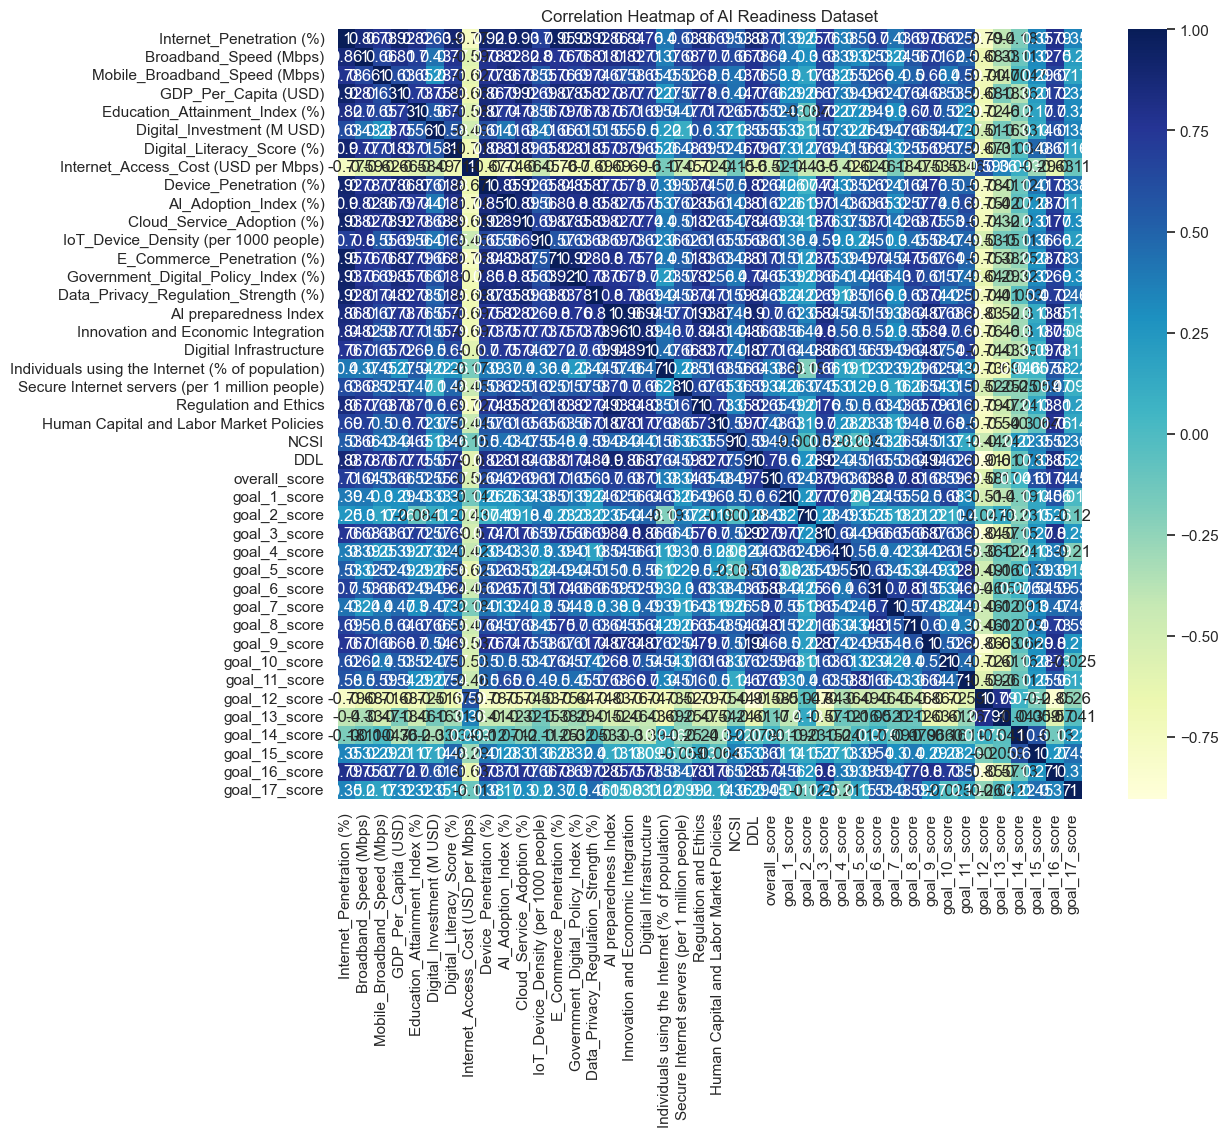

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load final dataset
df = pd.read_csv("final_ai_readiness_dataset.csv")

# Select only numeric columns
numeric_data = df.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)

# Add a title
plt.title("Correlation Heatmap of AI Readiness Dataset")

# Show the heatmap
plt.show()

In [207]:
# Summary statistics
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Internet_Penetration (%),23.0,73.496957,8.669161,65.97,66.0600,66.100000,83.1650,83.19
Broadband_Speed (Mbps),23.0,98.493913,63.027903,27.58,46.7900,75.570000,136.3200,211.71
Mobile_Broadband_Speed (Mbps),23.0,50.441304,21.584585,23.58,34.3200,47.300000,59.7800,104.93
GDP_Per_Capita (USD),23.0,32563.431739,26870.675979,3457.52,9972.2750,19470.790000,54834.8250,77762.47
Education_Attainment_Index (%),23.0,66.572609,18.621720,36.08,49.3550,70.160000,80.1250,95.65
Digital_Investment (M USD),23.0,695.410435,387.016300,299.10,468.3950,610.220000,696.2500,1826.98
Digital_Literacy_Score (%),23.0,64.662174,16.688118,37.06,49.7700,61.970000,79.0900,89.32
Internet_Access_Cost (USD per Mbps),23.0,2.729130,1.666589,0.55,1.7300,2.250000,3.3500,5.73
Device_Penetration (%),23.0,71.354783,16.999862,43.61,57.6950,68.420000,87.1250,95.27
AI_Adoption_Index (%),23.0,30.507391,17.245743,6.82,17.2300,26.110000,44.1950,60.78


In [208]:
# Part 4.2  AI preparedness index by country

<function matplotlib.pyplot.show(close=None, block=None)>

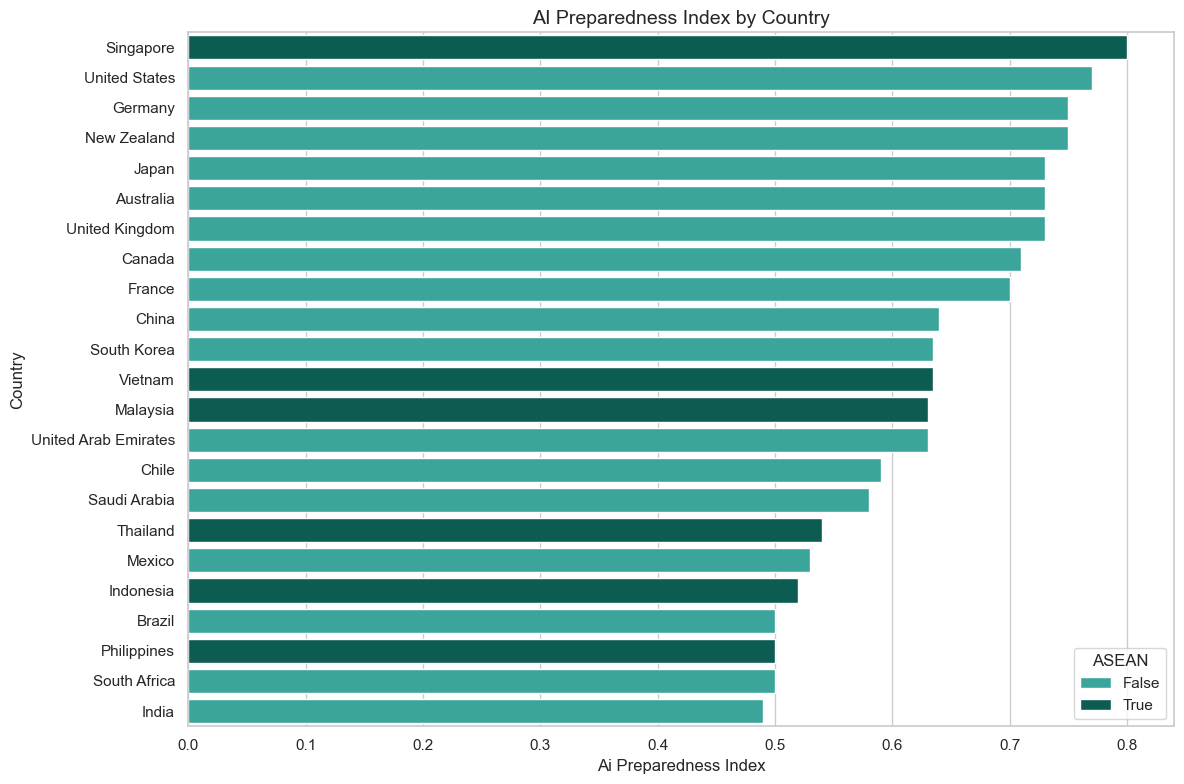

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ai_index = pd.read_csv("final_ai_readiness_dataset.csv")

# ASEAN countries
asean = [
    'Malaysia', 'Indonesia', 'Singapore', 'Thailand', 
    'Philippines', 'Vietnam', 'Brunei', 'Myanmar', 
    'Cambodia', 'Laos'
]   

# Create a new column indicating ASEAN \\
df_ai_index['ASEAN'] = df_ai_index['Country'].isin(asean)

# Sort countries by AI preparedness Index
df_sorted = df_ai_index.sort_values(by = 'AI preparedness Index', ascending = False)

# Plot
plt.figure(figsize = (12, 8))
dx = sns.barplot(data = df_sorted, 
            x = 'AI preparedness Index', 
            y = 'Country',
            hue = 'ASEAN', 
            dodge = False,
            palette = {True: '#00695C', False: '#2AB7A9'}
)

# Titles and Labels
plt.title('AI Preparedness Index by Country', fontsize = 14)
plt.xlabel('Ai Preparedness Index')
plt.ylabel('Country')

plt.tight_layout()

plt.show

In [210]:
# Custom for presentations slide

<function matplotlib.pyplot.show(close=None, block=None)>

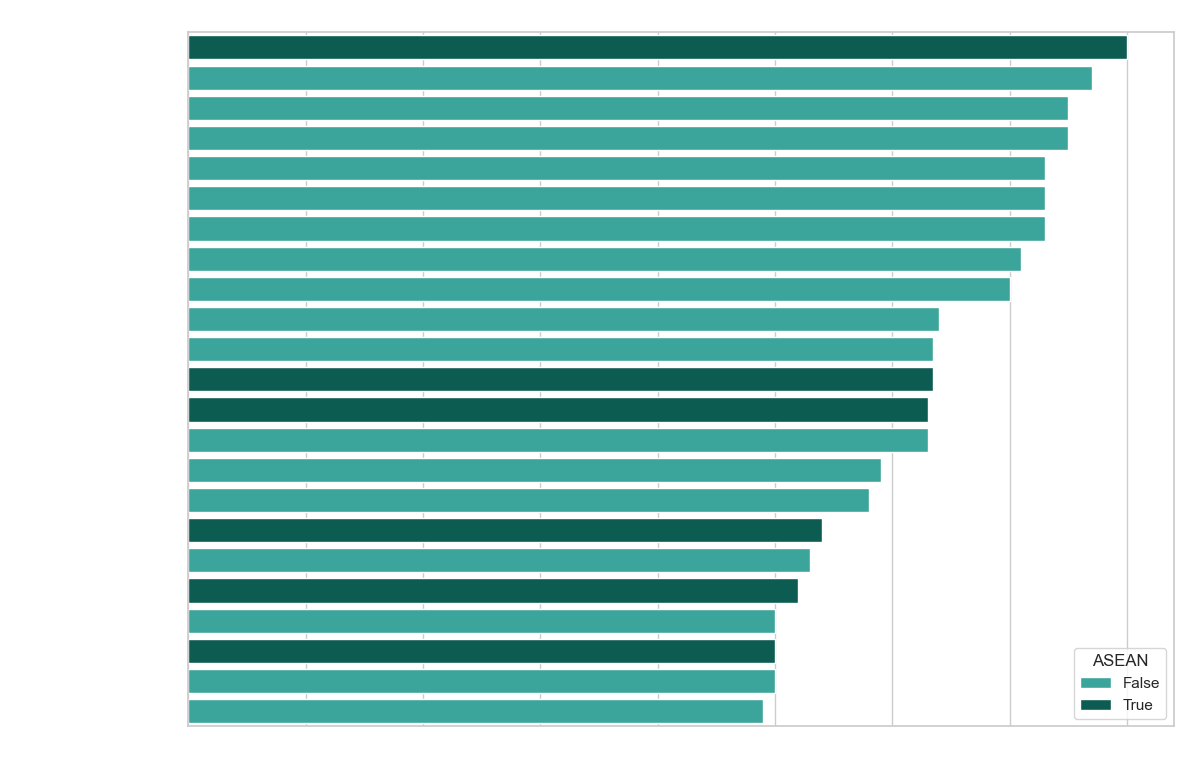

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ai_index = pd.read_csv("final_ai_readiness_dataset.csv")

# ASEAN countries
asean = [
    'Malaysia', 'Indonesia', 'Singapore', 'Thailand', 
    'Philippines', 'Vietnam', 'Brunei', 'Myanmar', 
    'Cambodia', 'Laos'
]   

# Create a new column indicating ASEAN membership
df_ai_index['ASEAN'] = df_ai_index['Country'].isin(asean)

# Sort countries by AI preparedness Index
df_sorted = df_ai_index.sort_values(by = 'AI preparedness Index', ascending = False)

# Plot
plt.figure(figsize = (12, 8))
dx = sns.barplot(data = df_sorted, 
            x = 'AI preparedness Index', 
            y = 'Country',
            hue = 'ASEAN', 
            dodge = False,
            palette = {True: '#00695C', False: '#2AB7A9'}
)

# Titles and Labels
plt.title('AI Preparedness Index by Country', fontsize = 14, color = 'white')
plt.xlabel('Ai Preparedness Index', color = 'white')
plt.ylabel('Country', color = 'white')

# tick label colors
plt.xticks(color = 'white')
plt.yticks(color = 'white')

plt.tight_layout()

# Save with transparent background
plt.savefig("ai preparedness index by counntry.png", transparent = True, dpi = 300)

plt.show

In [212]:
## Part 4.3  Digital AI investment by country

In [213]:
import pandas as pd 
import plotly.express as px

df_digital_invest = pd.read_csv("final_ai_readiness_dataset.csv")

# Define custom teal shades
teal_scale = [
    [0.0, '#E0F7F5'],  # light teal
    [0.5, '#2AB7A9'],  # medium teal
    [1.0, '#00695C']   # dark teal
]

# Create a treemap
fig = px.treemap(
    df_digital_invest,
    path = ['Region', 'Country'],
    values = 'Digital_Investment (M USD)',
    color='Digital_Investment (M USD)',
    color_continuous_scale = teal_scale,
    title = 'Digital Investment by Country (Millions USD)'
)

# Show values on tiles
fig.update_traces(
    texttemplate = '%{label}<br>$%{value:.2f} M',
    textposition = 'middle center'
)

# Increase figure size
fig.update_layout(
    width=1000,
    height=800
)

fig.show()

In [214]:
## 4.4 Cybersercurity vs AI preparedness Index

<function matplotlib.pyplot.show(close=None, block=None)>

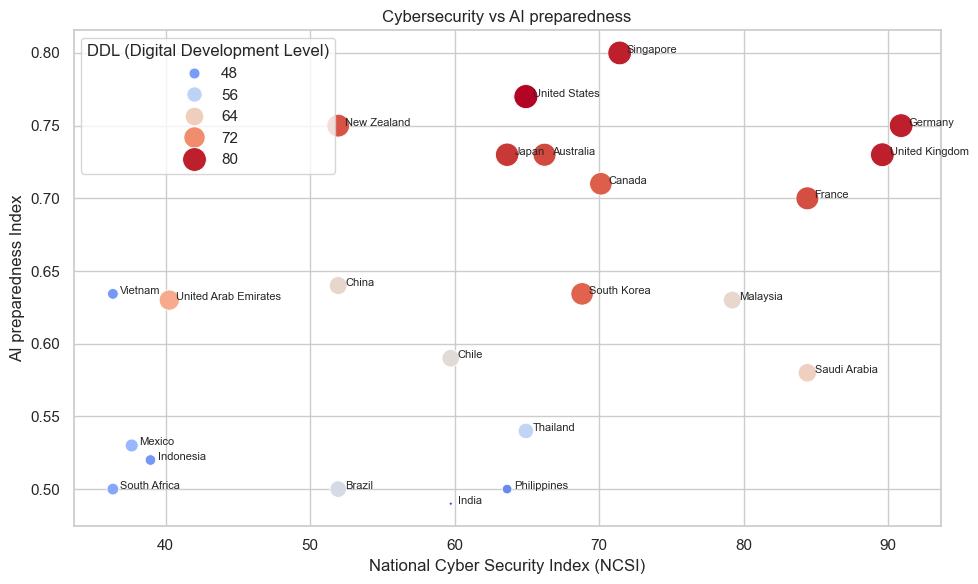

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

df_ai_cyber = pd.read_csv("final_ai_readiness_dataset.csv")

# Plot
plt.figure(figsize = (10,6))
scatter = sns.scatterplot(
    data = df_ai_cyber,
    x = 'NCSI',
    y = 'AI preparedness Index',
    size = 'DDL',
    hue = 'DDL',
    palette=sns.color_palette("coolwarm", as_cmap=True),
    sizes = (5, 300),
    legend = 'brief'
)

# Annotate country names
for i, row in df.iterrows():
    plt.text(
        row['NCSI'] + 0.5,  # small shift to avoid overlap
        row['AI preparedness Index'],
        row['Country'],
        fontsize=8
    )

plt.title('Cybersecurity vs AI preparedness')
plt.xlabel('National Cyber Security Index (NCSI)')
plt.ylabel('AI preparedness Index')
plt.legend(title = 'DDL (Digital Development Level)')
plt.grid(True)

plt.tight_layout()

# Save
plt.savefig("cybersecurity vs AI preparedness.png", dpi = 300)

plt.show

In [216]:
# 4.5 Goal 9 vs AI preparedness Index

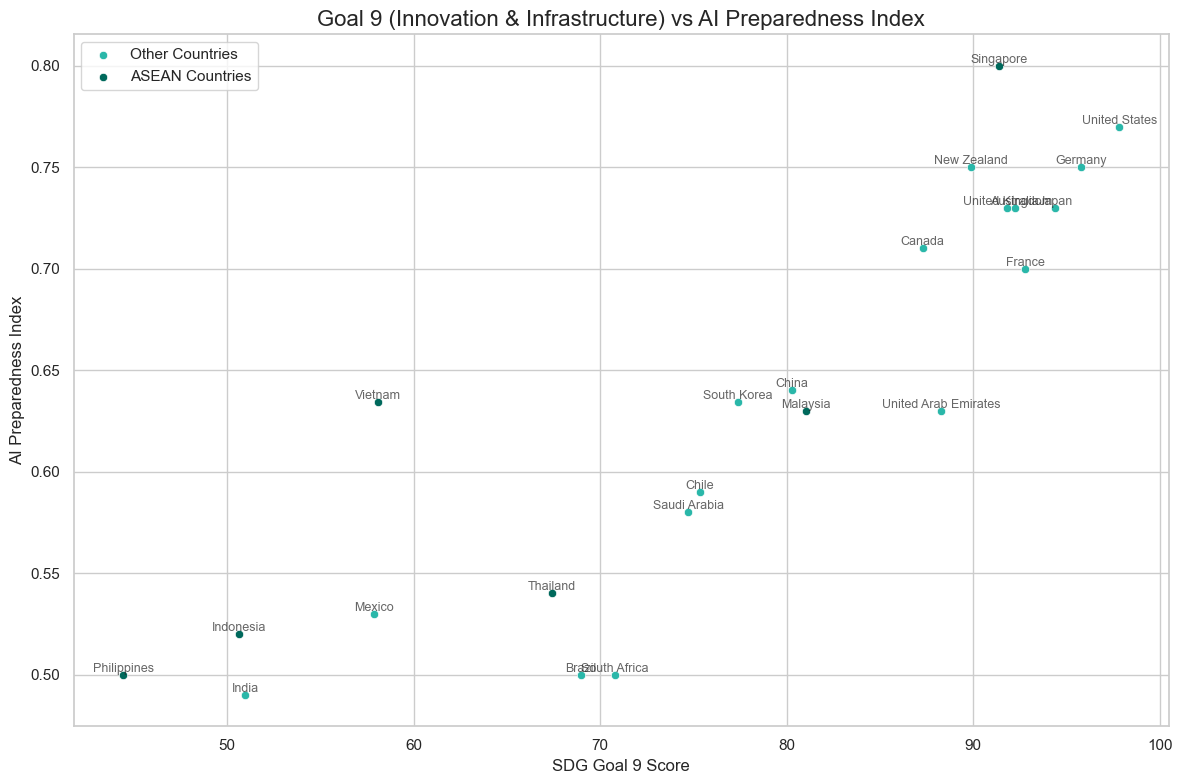

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df_ai_sdg = pd.read_csv("final_ai_readiness_dataset.csv")

# Define ASEAN countries
asean = [
    'Malaysia', 'Indonesia', 'Singapore', 'Thailand', 
    'Philippines', 'Vietnam', 'Brunei', 'Myanmar', 
    'Cambodia', 'Laos'
]   

# Create a new column to mark ASEAN countries
df_ai_sdg['ASEAN'] = df_ai_sdg['Country'].isin(asean)


# Set up the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot other countries
sns.scatterplot(
    data = df_ai_sdg[~df_ai_sdg['ASEAN']],
    x = 'goal_9_score',
    y = 'AI preparedness Index',
    color = '#2AB7A9',
    label = 'Other Countries'
)

# Plot ASEAN countries
sns.scatterplot(
    data = df_ai_sdg[df_ai_sdg['ASEAN']],
    x = 'goal_9_score',
    y = 'AI preparedness Index',
    color = '#00695C',
    label = 'ASEAN Countries'
)

# Annotate all countries
for i, row in df_ai_sdg.iterrows():
    plt.text(row['goal_9_score'], row['AI preparedness Index'], row['Country'],
             fontsize = 9, ha = 'center', va = 'bottom', alpha = 0.7)

# Titles and labels
plt.title("Goal 9 (Innovation & Infrastructure) vs AI Preparedness Index", fontsize=16)
plt.xlabel("SDG Goal 9 Score")
plt.ylabel("AI Preparedness Index")
plt.legend()

plt.tight_layout()
plt.show()

In [218]:
# 4.6 Digital Infrastructure vs AI preparedness Index

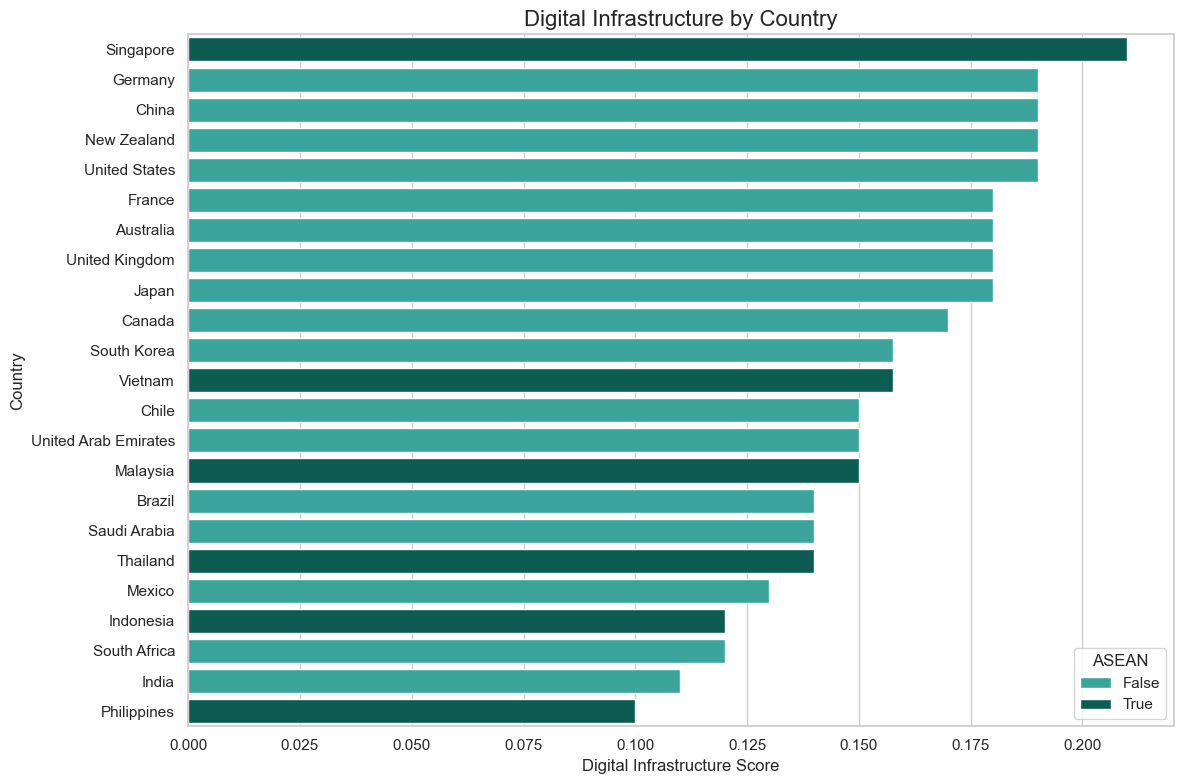

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df_ai_infra = pd.read_csv("final_ai_readiness_dataset.csv")

asean = [
    'Malaysia', 'Indonesia', 'Singapore', 'Thailand', 
    'Philippines', 'Vietnam', 'Brunei', 'Myanmar', 
    'Cambodia', 'Laos'
]

# Create 'ASEAN' column
df_ai_infra['ASEAN'] = df_ai_infra['Country'].isin(asean)

# Plot the bar chart
plt.figure(figsize=(12, 8))

# Sort by Digital Infrastructure
df_sorted = df_ai_infra.sort_values(by='Digitial Infrastructure', ascending=False)

sns.barplot(
    data=df_sorted,
    y='Country',
    x='Digitial Infrastructure',
    hue='ASEAN',
    palette={True: '#00695C', False: '#2AB7A9'}
)

plt.title("Digital Infrastructure by Country", fontsize=16)
plt.xlabel("Digital Infrastructure Score")
plt.ylabel("Country")
plt.legend(title="ASEAN")
plt.tight_layout()
plt.show()

In [220]:
# For Presentation Slide

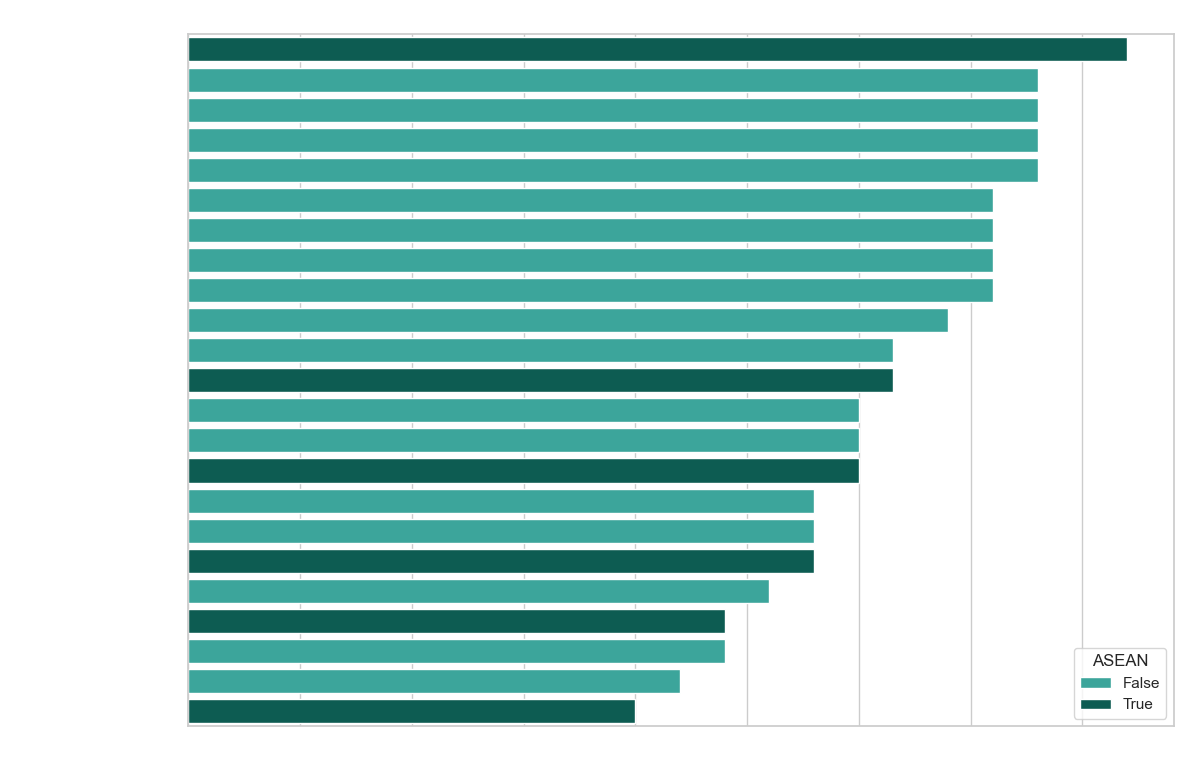

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df_ai_infra = pd.read_csv("final_ai_readiness_dataset.csv")

asean = [
    'Malaysia', 'Indonesia', 'Singapore', 'Thailand', 
    'Philippines', 'Vietnam', 'Brunei', 'Myanmar', 
    'Cambodia', 'Laos'
]

# Create 'ASEAN' column
df_ai_infra['ASEAN'] = df_ai_infra['Country'].isin(asean)

# Plot the bar chart
plt.figure(figsize=(12, 8))

# Sort by Digital Infrastructure
df_sorted = df_ai_infra.sort_values(by='Digitial Infrastructure', ascending=False)

sns.barplot(
    data=df_sorted,
    y='Country',
    x='Digitial Infrastructure',
    hue='ASEAN',
    palette={True: '#00695C', False: '#2AB7A9'}
)

plt.title("Digital Infrastructure by Country ", fontsize=16, color = 'white')
plt.xlabel("Digital Infrastructure Score", color = 'white')
plt.ylabel("Country", color = 'white')
plt.legend(title="ASEAN")
plt.tight_layout()

# tick label colors
plt.xticks(color = 'white')
plt.yticks(color = 'white')

# Save with transparent background
plt.savefig("Digital Infrastructure by country.png", transparent = True, dpi = 300)

plt.show()

In [222]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_ai_cluster = pd.read_csv("final_ai_readiness_dataset.csv")

# Columns selected
columns = [ 
    'Internet_Penetration (%)',
    'Education_Attainment_Index (%)',
    'Digital_Literacy_Score (%)',
    'Internet_Access_Cost (USD per Mbps)', 
    'Device_Penetration (%)',
    'AI_Adoption_Index (%)',
    'Cloud_Service_Adoption (%)',
    'E_Commerce_Penetration (%)',
    'Government_Digital_Policy_Index (%)',
    'Data_Privacy_Regulation_Strength (%)'
]

# Working copy with country
df_selected = df_ai_cluster[['Country'] + columns].copy()

# Normalize everything exceptt internet cost
cols_to_normalize = [col for col in columns if col !='Internet_Access_Cost (USD per Mbps)']
scaler = MinMaxScaler()
df_selected[cols_to_normalize] = scaler.fit_transform(df_selected[cols_to_normalize])

# Invert & normalize Intenret cost = higher cost = worse)
df_selected['Internet_Access_Cost (USD per Mbps)'] = 1 -scaler.fit_transform(
    df_selected[['Internet_Access_Cost (USD per Mbps)']]
)

df_selected['Digital Readiness Score'] = df_selected[columns].mean(axis = 1).round(2)

# Sort by countries readiness score
df_ranked = df_selected.sort_values(by = "Digital Readiness Score", ascending = False)

# Display all rankings
print(df_ranked[['Country', 'Digital Readiness Score']])

                 Country  Digital Readiness Score
0              Australia                     0.95
12           New Zealand                     0.92
20        United Kingdom                     0.90
6                Germany                     0.85
9                  Japan                     0.84
5                 France                     0.84
15             Singapore                     0.83
17           South Korea                     0.83
2                 Canada                     0.80
21         United States                     0.79
4                  China                     0.30
11                Mexico                     0.28
7                  India                     0.27
16          South Africa                     0.26
3                  Chile                     0.25
18              Thailand                     0.24
19  United Arab Emirates                     0.22
10              Malaysia                     0.20
13           Philippines                     0.19


In [223]:
import pandas as pd

def classify(score):
    if score >= 0.75:
        return 'Leading'
    elif score >= 0.25:
        return 'Transforming'
    else:
        return 'Developing'

df_ranked['Readiness Cluster'] = df_ranked['Digital Readiness Score'].apply(classify)

# View Sample Countries per group
for group in ['Developing', 'Transforming', 'Leading']:
    print(f"\n{group} Countries:")
    print(df_ranked[df_ranked['Readiness Cluster'] == group][['Country', 'Digital Readiness Score']])


Developing Countries:
                 Country  Digital Readiness Score
18              Thailand                     0.24
19  United Arab Emirates                     0.22
10              Malaysia                     0.20
13           Philippines                     0.19
14          Saudi Arabia                     0.18
8              Indonesia                     0.18
22               Vietnam                     0.18
1                 Brazil                     0.15

Transforming Countries:
         Country  Digital Readiness Score
4          China                     0.30
11        Mexico                     0.28
7          India                     0.27
16  South Africa                     0.26
3          Chile                     0.25

Leading Countries:
           Country  Digital Readiness Score
0        Australia                     0.95
12     New Zealand                     0.92
20  United Kingdom                     0.90
6          Germany                     0.85
9         

In [224]:
# Countries Classification

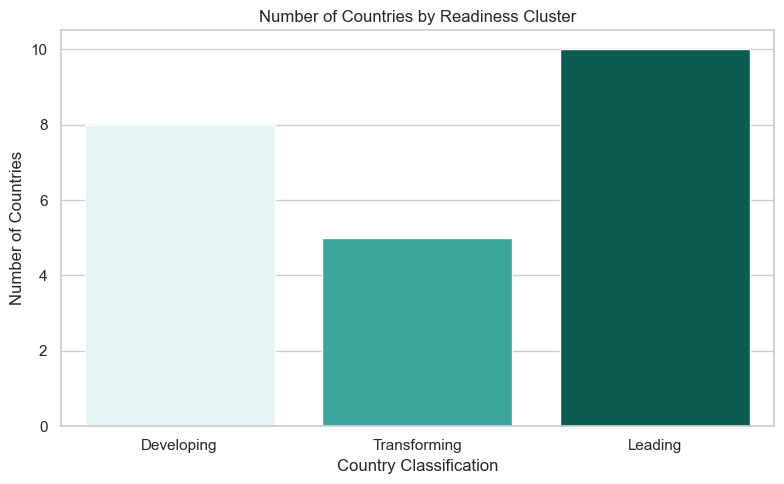

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette as a dictionary
teal_palette = {
    'Developing': '#E0F7F5',     # Light teal
    'Transforming': '#2AB7A9',   # Medium teal
    'Leading': '#00695C'         # Dark teal
}

# Plot
plt.figure(figsize = (8, 5))
sns.countplot(
    data = df_ranked,
    x = 'Readiness Cluster',
    hue = 'Readiness Cluster',           # Add hue
    order = ['Developing', 'Transforming', 'Leading'],
    palette = teal_palette,
    legend = False               
)

plt.title('Number of Countries by Readiness Cluster')
plt.xlabel('Country Classification')
plt.ylabel('Number of Countries')


plt.tight_layout()
plt.show()

In [226]:
# For Preentation Slide

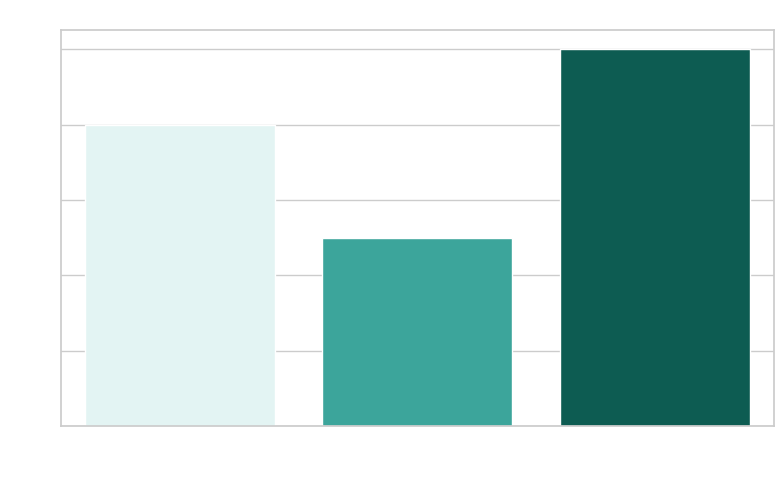

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette as a dictionary
teal_palette = {
    'Developing': '#E0F7F5',     # Light teal
    'Transforming': '#2AB7A9',   # Medium teal
    'Leading': '#00695C'         # Dark teal
}

# Plot
plt.figure(figsize = (8, 5))
sns.countplot(
    data = df_ranked,
    x = 'Readiness Cluster',
    hue = 'Readiness Cluster',           # Add hue
    order = ['Developing', 'Transforming', 'Leading'],
    palette = teal_palette,
    legend = False               
)

plt.title('Number of Countries by Readiness Cluster', color = 'white')
plt.xlabel('Country Classification', color = 'white')
plt.ylabel('Number of Countries', color = 'white')

# tick label colors
plt.xticks(color = 'white')
plt.yticks(color = 'white')

# Save with transparent background
plt.savefig("Country Classification.png", transparent = True, dpi = 300)

plt.tight_layout()
plt.show()